In [13]:
dataset<-read.csv("D:\\R_TXT_MINE_DATA\\creditcard.csv",header = TRUE,
                   stringsAsFactors = FALSE,
                   strip.white = TRUE ,
                   sep = ',')

#checking overall dataset and coverting 'class' as factor variables 
str(dataset)
dataset$Class = as.factor(dataset$Class)
str(dataset$Class)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [15]:
#Excluding 'Time' variable from dataset for further analysis
dataset = dataset[,2:31]
# Feature Scaling for 'amount'
library(scales)
dataset[,29] = rescale(dataset[,29], to = c(0,1))
head(dataset$Amount)

[1] 0.0058237931 0.0001047053 0.0147389219 0.0048071010 0.0027242834
[6] 0.0001428507

ERROR: Error in cor(dataset$Time, dataset$Class): 'x' must be numeric


In [16]:
#To overcome the imbalance in dataset I'll apply oversampling 
#Checking imbalance in the dataset
summary(dataset$Class)
prop.table(table(dataset$Class)) #99.8% proper transaction, 0.2% fraud. 


0      1 
284315    492


          0           1 
0.998272514 0.001727486 

In [17]:
#install.packages("ROSE")
#Implementing oversampling
library(ROSE)
dataset = ovun.sample(Class~., data = dataset, method = 'over', 
                      N = 2*284315, seed = 1234)$data
summary(dataset$Class)

0      1 
284315 284315

In [18]:

# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Class, SplitRatio = 0.8)
training = subset(dataset, split == TRUE)
test = subset(dataset, split == FALSE)
summary(training$Class)
summary(test$Class)

0      1 
227452 227452

0     1 
56863 56863

In [26]:
#fitting random forest classifier model 
#install.packages("randomForest")

library(randomForest)
set.seed(123)
classifier = randomForest(x = training[-30],
                          y = training$Class,
                          ntree = 50)

# Predicting the Test set results
y_pred = predict(classifier, newdata = test[-31])


In [25]:
# Making the Confusion Matrix
library(caret)
confusionMatrix(test$Class,y_pred)
table(test$Class,y_pred > 0.8)

Warning message in Ops.factor(predictedScores, threshold):
"'<' not meaningful for factors"

0,1


Warning message in Ops.factor(y_pred, 0.8):
"'>' not meaningful for factors"

< table of extent 2 x 0 >

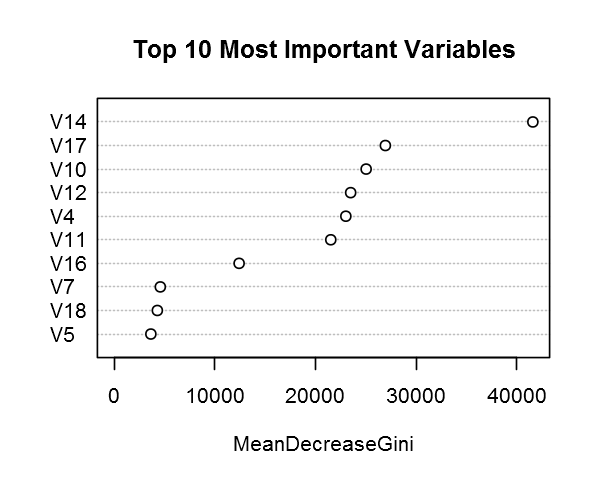

In [27]:
set.seed(123) 
library(randomForest)
options(repr.plot.width=5, repr.plot.height=4)
varImpPlot(classifier,
          sort = T,
           n.var=10,
           main="Top 10 Most Important Variables")